# Data preparation

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import Cdf
import Pmf

# define global plot parameters
params = {'axes.labelsize' : 12, 'axes.titlesize' : 12,
          'font.size' : 12, 'legend.fontsize' : 12,
          'xtick.labelsize' : 10, 'ytick.labelsize' : 12}
plt.rcParams.update(params)
plt.rcParams.update({'figure.max_open_warning': 0})

# connect to database and get data
conn = sqlite3.connect('data/youtube-traceroute.db')

# read necessary tables from database
pair_medians = pd.read_sql_query('select * from pair_medians', conn)

conn.close()

## CDF over deltas of destination pairs for TTL and RTT

In [2]:
# get CDF
ttl_cdf = Cdf.MakeCdfFromList(pair_medians['ttl_delta'])
rtt_cdf = Cdf.MakeCdfFromList(pair_medians['rtt_delta'])

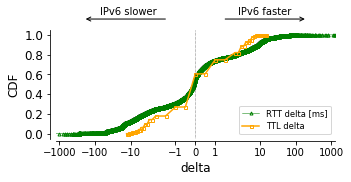

In [3]:
## Both TTL and RTT in one plot
cdf_fig, cdf_ax = plt.subplots(figsize = (5, 2))
cdf_ax.plot(rtt_cdf.xs, rtt_cdf.ps,
            label = 'RTT delta [ms]',
            marker = '^',
            linewidth = 0.5,
            markersize = 3,
            fillstyle = 'none',
            color = 'green')
cdf_ax.plot(ttl_cdf.xs, ttl_cdf.ps,
            label = 'TTL delta',
            marker = 's',
            linewidth = 1.5,
            markersize = 3,
            fillstyle = 'none',
            color = 'orange')

# PLOT FORMATTING
# customize axes and grid appearance
cdf_ax.legend(loc = 'lower right', fontsize = 'smaller')
cdf_ax.set_xscale('symlog')
cdf_ax.set_xlim([-1250, 1250])
cdf_ax.set_ylim([-0.05, 1.05])
cdf_ax.set_xlabel('delta')
cdf_ax.set_ylabel('CDF')

yticks = np.arange(0.0, 1.01, 0.2)
cdf_ax.set_yticks(yticks)
cdf_ax.grid(False)
cdf_ax.spines['right'].set_color('none')
cdf_ax.spines['top'].set_color('none')
cdf_ax.yaxis.set_ticks_position('left')
cdf_ax.xaxis.set_ticks_position('bottom')
cdf_ax.spines['bottom'].set_position(('axes', -0.02))
cdf_ax.spines['left'].set_position(('axes', -0.02))

from matplotlib.ticker import ScalarFormatter
cdf_ax.xaxis.set_major_formatter(ScalarFormatter())


# add arrows and text which indicate in which region IPv6 was better/worse than IPv4
cdf_ax.annotate('', xy = (0.4, 1.1),
                xycoords = 'axes fraction',
                xytext = (0.1, 1.1),
                arrowprops = dict(arrowstyle = '<-'))
cdf_ax.annotate('', xy = (0.9, 1.1),
                xycoords = 'axes fraction',
                xytext = (0.6, 1.1),
                arrowprops = dict(arrowstyle = '->'))
cdf_ax.text(-70, 1.2, 'IPv6 slower')
cdf_ax.text(2.5, 1.2, 'IPv6 faster')

# dotted vertical line to separate positive and negative delta region
cdf_ax.axvline(0, linestyle = 'dotted', color = 'black', linewidth = 0.5)

# saving and showing plot
cdf_fig.savefig('plots/destination_pair_cdf.pdf', bbox_inches = 'tight')
plt.show()

In [4]:
# get rough idea of absolute distribution of TTL deltas
pair_medians.groupby(['ttl_delta']).size()

ttl_delta
-13.0        1
-12.0       29
-11.5        1
-11.0      235
-10.5        3
-10.0       91
-9.0       163
-8.0       260
-7.5         2
-7.0       252
-6.5         6
-6.0       755
-5.5         5
-5.0       894
-4.5         4
-4.0      1367
-3.5        15
-3.0      2086
-2.5         5
-2.0      1547
-1.5        27
-1.0      3921
-0.5        47
 0.0     14467
 0.5        65
 1.0      6109
 1.5        27
 2.0      3137
 2.5        20
 3.0      2694
 3.5        22
 4.0      1768
 4.5        12
 5.0      1151
 5.5         5
 6.0       990
 7.0       431
 8.0       444
 8.5         4
 9.0       162
 9.5         4
 10.0       48
 11.0       27
 12.0        7
 12.5        1
 13.0        2
 14.0        9
 15.0        5
dtype: int64

## Distributions of median deltas

In [5]:
print('------ TTL ------')
print('m_ttl_delta; cdf')
print('-----------------')
for x, y in zip(ttl_cdf.xs, ttl_cdf.ps):
    print('%.2f; %.5f' % (x, y))

------ TTL ------
m_ttl_delta; cdf
-----------------
-13.00; 0.00002
-12.00; 0.00069
-11.50; 0.00072
-11.00; 0.00614
-10.50; 0.00621
-10.00; 0.00831
-9.00; 0.01207
-8.00; 0.01807
-7.50; 0.01812
-7.00; 0.02393
-6.50; 0.02407
-6.00; 0.04150
-5.50; 0.04161
-5.00; 0.06225
-4.50; 0.06234
-4.00; 0.09389
-3.50; 0.09424
-3.00; 0.14238
-2.50; 0.14250
-2.00; 0.17820
-1.50; 0.17883
-1.00; 0.26932
-0.50; 0.27041
0.00; 0.60431
0.50; 0.60581
1.00; 0.74681
1.50; 0.74743
2.00; 0.81984
2.50; 0.82030
3.00; 0.88248
3.50; 0.88298
4.00; 0.92379
4.50; 0.92407
5.00; 0.95063
5.50; 0.95075
6.00; 0.97360
7.00; 0.98354
8.00; 0.99379
8.50; 0.99388
9.00; 0.99762
9.50; 0.99772
10.00; 0.99882
11.00; 0.99945
12.00; 0.99961
12.50; 0.99963
13.00; 0.99968
14.00; 0.99988
15.00; 1.00000


In [6]:
print('------ RTT ------')
print('m_rtt_delta; cdf')
print('-----------------')
for x, y in list(zip(rtt_cdf.xs, rtt_cdf.ps))[0::100]:
    print('%.2f; %.5f' % (x, y))

------ RTT ------
m_rtt_delta; cdf
-----------------
-9961.96; 0.00002
-275.92; 0.00235
-139.20; 0.00466
-85.51; 0.00697
-63.05; 0.00928
-53.78; 0.01161
-49.16; 0.01394
-48.32; 0.01639
-47.89; 0.01888
-46.49; 0.02126
-45.76; 0.02368
-44.51; 0.02599
-40.76; 0.02832
-37.06; 0.03070
-35.30; 0.03300
-33.93; 0.03536
-31.16; 0.03774
-29.22; 0.04009
-28.01; 0.04251
-26.54; 0.04491
-25.43; 0.04734
-23.74; 0.04965
-22.80; 0.05200
-21.62; 0.05442
-20.68; 0.05680
-19.61; 0.05925
-18.93; 0.06174
-18.52; 0.06432
-18.17; 0.06691
-17.92; 0.06966
-17.73; 0.07247
-17.51; 0.07529
-17.27; 0.07808
-17.06; 0.08073
-16.77; 0.08346
-16.41; 0.08597
-15.99; 0.08856
-15.52; 0.09107
-15.06; 0.09350
-14.94; 0.09768
-14.71; 0.10038
-14.31; 0.10305
-13.76; 0.10559
-13.10; 0.10804
-12.54; 0.11049
-11.97; 0.11295
-11.46; 0.11545
-10.99; 0.11794
-10.60; 0.12048
-10.25; 0.12318
-9.88; 0.12576
-9.54; 0.12835
-9.24; 0.13107
-9.00; 0.13377
-8.78; 0.13657
-8.56; 0.13938
-8.33; 0.14197
-8.08; 0.14462
-7.79; 0.14737
-7.51; 0